# This notebook shows how to solve a majority judgment

# 1. Basic functions

In [40]:
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.append('../')

import django
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "jmapp.settings")
django.setup()

from majority_judgment.tools import *

# 2. Generate data

In [33]:
# parameters    
Nratings     = 300
grades       = ["Excellent", "Good", "Fair", "Poor", "Reject"]
Ngrades      = len(grades)
candidates   = ["Bayrou", "Royal", "Sarkozy", "Voynet", "Besancenot", \
                "Buffet", "Bové", "Laguiller", "Nihous", "de Villiers", \
                "Schivardi", "Le Pen"]
Ncandidates  = len(candidates)

# generate data
results   = []
scores    = np.zeros((Ncandidates, Ngrades))

for i in range(Ncandidates):
    ratings = np.random.randint(0, Ngrades, Nratings)
    r       = Result(name = candidates[i], ratings = ratings, grades = grades)
    results.append(r)
    scores[i, :] = sorted_scores(ratings, Ngrades)

# 3. Visualize the sorted scores

<IPython.core.display.Javascript object>


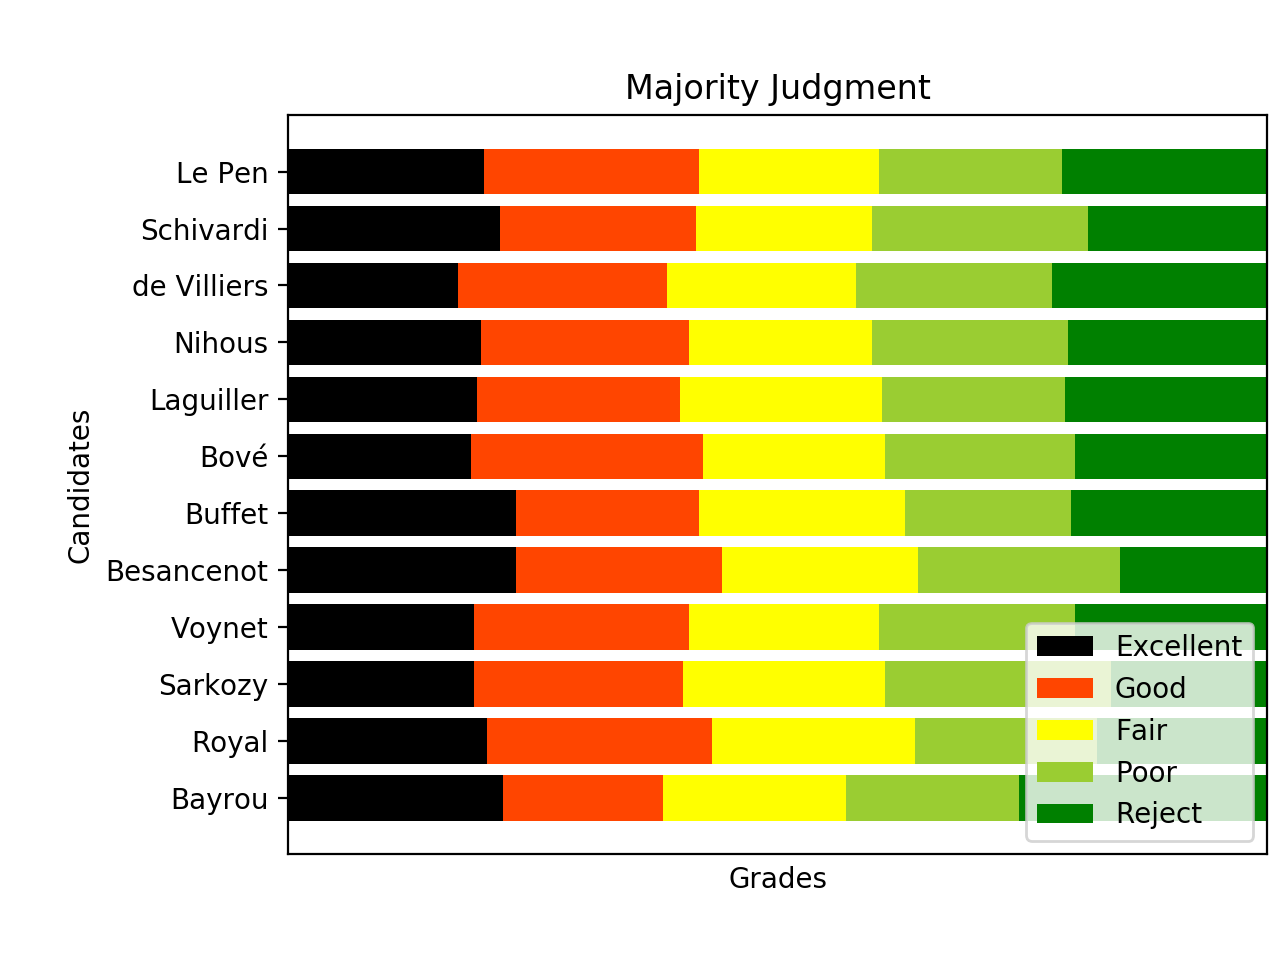

In [14]:
# colors from mieux choisir
colors = ['#5555AA', '#5E84C2', '#008080', '#ED5960', '#BB0000']
# colors from matplotlib
colors = [plt.cm.plasma(1-k/Ngrades, 1) for k in range(Ngrades)]
# colors from wikipedia majority judgment
colors = [ "black", "orangered", "yellow", "YellowGreen", "green"] 

plot_scores(scores, grades, names=candidates, height = 0.8, color = colors)
plt.show()

# 4. Final results

In [4]:
res = majority_judgment(results)
print("Ranking is: " + ", ".join(map(str, res)))

Ranking is: Nihous, Schivardi, de Villiers, Laguiller, Buffet, Voynet, Le Pen, Besancenot, Royal, Bové, Sarkozy, Bayrou


# 5. With the Django database


<IPython.core.display.Javascript object>


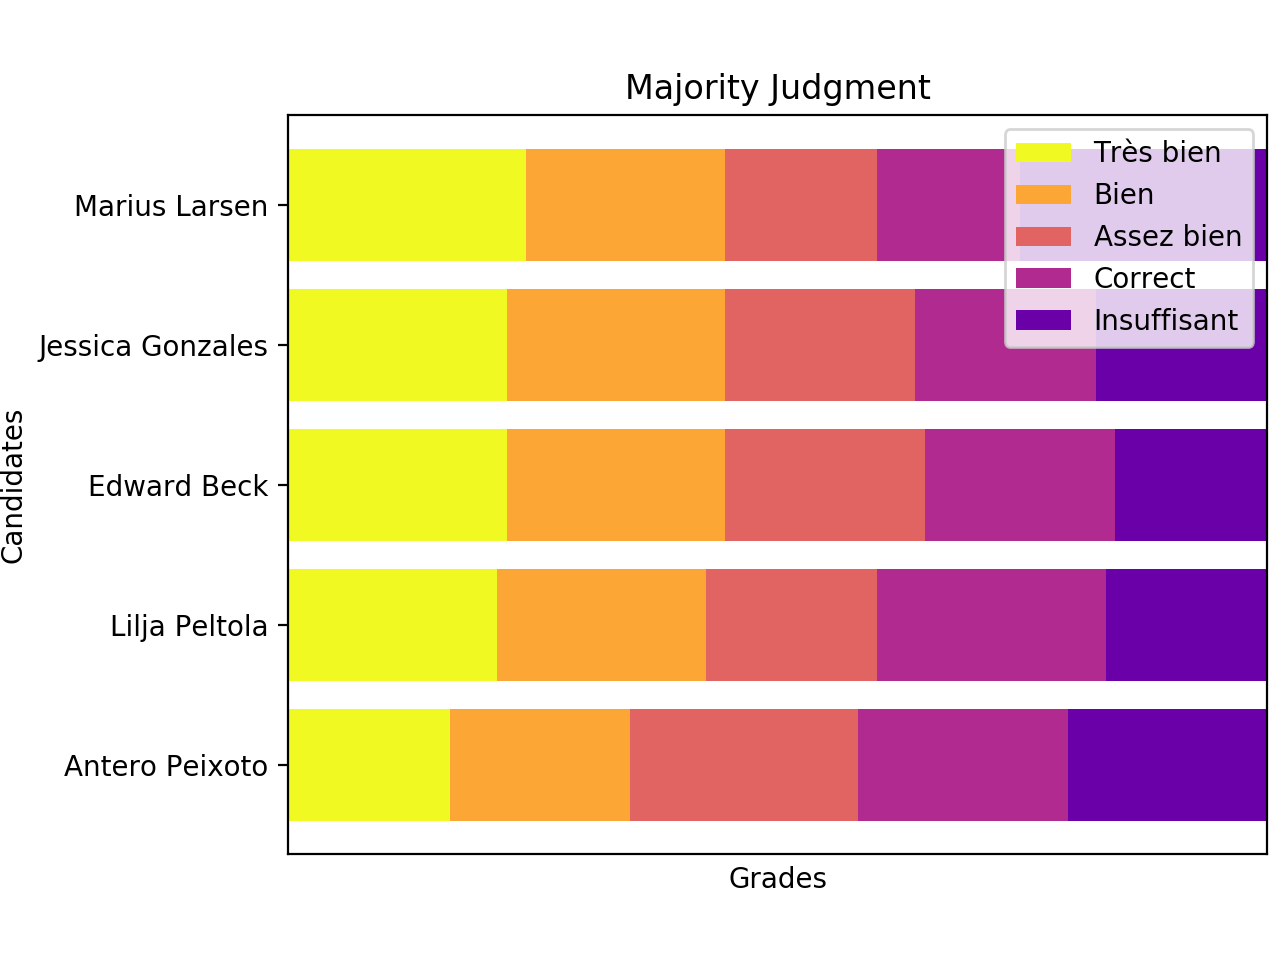

In [43]:
# read database
grades  = [g.name for g in Grade.objects.all()]
ratings = get_ratings()
names   = []
results = []
cs      = Candidate.objects.all()

for i in range(len(cs)):
    result = Result(candidate = cs[i], ratings = ratings[i, :], grades = grades)
    results.append(result)
    names.append(result.name)

# display figure
fig = plt.figure()
ax = fig.add_subplot(111)
plot_scores(scores, grades=grades,  names=names, figure=fig)
plt.show()

In [49]:
res = majority_judgment(results)
print("Ranking is: " + ", ".join(map(str, res)))

Ranking is: Lilja Peltola, Marius Larsen, Edward Beck, Jessica Gonzales, Antero Peixoto
